# Minimal Example with Tensorflow 2.0

## Import relevant libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [3]:
observations = 1000

xs = np.random.uniform(-10, 10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)



## Solving with TensorFlow

In [5]:
training_data = np.load('TF_intro.npz')


Step 1: Data -> Done above 

Step 2: Model -> Done

Step 3: Objective Function

Step 4: Optimization algorithm (Optimizer)


- Step 2: 

tf.keras.Squential(): A Sequential model is appropriate for a <b>plain stack of layers</b> where each layer has exactly <b>one input tensor </b>and <b>one output tensor</b>

tf.keras.layers.Dense(output_size): Dense implements the operation: output = np.dot(inputs, weights) + bias
 
- Step 3 & 4:
model.compile(optimizer, loss): is the place where you select and indicate the optimizers and the loss

Note: 
- Epoch = iteration over the full dataset
- Kernels = weights


In [25]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of variables you have
input_size = 2
# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size = 1

# Outline the model
# We lay out the model in 'Sequential'
# Note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Note that sometimes you may also need a custom loss function 
# That's much harder to implement and won't be covered in this course though

# 'compile' is the place where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 28.2228
Epoch 2/100
32/32 - 0s - loss: 1.1683
Epoch 3/100
32/32 - 0s - loss: 0.4176
Epoch 4/100
32/32 - 0s - loss: 0.4167
Epoch 5/100
32/32 - 0s - loss: 0.3644
Epoch 6/100
32/32 - 0s - loss: 0.4165
Epoch 7/100
32/32 - 0s - loss: 0.3757
Epoch 8/100
32/32 - 0s - loss: 0.3782
Epoch 9/100
32/32 - 0s - loss: 0.3580
Epoch 10/100
32/32 - 0s - loss: 0.3823
Epoch 11/100
32/32 - 0s - loss: 0.3577
Epoch 12/100
32/32 - 0s - loss: 0.3773
Epoch 13/100
32/32 - 0s - loss: 0.3695
Epoch 14/100
32/32 - 0s - loss: 0.3773
Epoch 15/100
32/32 - 0s - loss: 0.4096
Epoch 16/100
32/32 - 0s - loss: 0.3806
Epoch 17/100
32/32 - 0s - loss: 0.3686
Epoch 18/100
32/32 - 0s - loss: 0.3905
Epoch 19/100
32/32 - 0s - loss: 0.3644
Epoch 20/100
32/32 - 0s - loss: 0.3895
Epoch 21/100
32/32 - 0s - loss: 0.3680
Epoch 22/100
32/32 - 0s - loss: 0.3775
Epoch 23/100
32/32 - 0s - loss: 0.3608
Epoch 24/100
32/32 - 0s - loss: 0.3754
Epoch 25/100
32/32 - 0s - loss: 0.3963
Epoch 26/100
32/32 - 0s - loss: 0

## Extract the weights and bias

In [26]:
model.layers[0].get_weights()

[array([[ 2.1047184],
        [-2.991134 ]], dtype=float32),
 array([4.980537], dtype=float32)]

In [27]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.1047184],
       [-2.991134 ]], dtype=float32)

In [28]:
bias = model.layers[0].get_weights()[1]
bias

array([4.980537], dtype=float32)

## Extract the outputs (make prediction)

Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell us much in a deep learning context. However, this simple example was set up in a way, which allows us to verify if the answers we get are correct.

In [29]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-30.3],
       [-13.1],
       [  6.2],
       [ 19.1],
       [ 20.8],
       [  5.8],
       [  0.8],
       [-23.2],
       [-32.8],
       [-20.6],
       [ 25.9],
       [  0.6],
       [  3.8],
       [-10.9],
       [  7. ],
       [ 14.9],
       [ 19.5],
       [ -1.2],
       [ 27.6],
       [ 24.4],
       [ 37.3],
       [ 20.6],
       [ 31.1],
       [-12. ],
       [ -7. ],
       [-34.1],
       [-19.7],
       [  9.5],
       [-20.9],
       [ -6.4],
       [  3.6],
       [ 34.8],
       [ 15. ],
       [ -2.1],
       [  1.3],
       [-23.7],
       [  0.4],
       [ -7.8],
       [  9.1],
       [ 47. ],
       [ 11.4],
       [ -9.3],
       [ 45.6],
       [ 16.5],
       [ -7.8],
       [ 23.9],
       [-18.4],
       [ -9.5],
       [-21. ],
       [-10.1],
       [  6.4],
       [-25. ],
       [-31.4],
       [ 13.4],
       [ 16.9],
       [ 35.4],
       [ 40.2],
       [-23.2],
       [  6.4],
       [ 16.7],
       [-29.1],
       [ 34.7],
       [

In [30]:
training_data['targets'].round(1)

array([[-31. ],
       [-13.8],
       [  4.8],
       [ 18.9],
       [ 21.3],
       [  4.7],
       [  2. ],
       [-23.3],
       [-32. ],
       [-19.6],
       [ 24.5],
       [ -0. ],
       [  5.4],
       [-12.1],
       [  7.5],
       [ 14.8],
       [ 19. ],
       [ -1.5],
       [ 27.5],
       [ 24.1],
       [ 36.8],
       [ 20.4],
       [ 30.3],
       [-11.1],
       [ -7.5],
       [-33.5],
       [-19.6],
       [  8.5],
       [-21.4],
       [ -6.9],
       [  3. ],
       [ 35. ],
       [ 15.1],
       [ -1.6],
       [  2.4],
       [-23.2],
       [  0.9],
       [ -8. ],
       [ 10.2],
       [ 46.2],
       [ 12.1],
       [ -9.7],
       [ 45.2],
       [ 14.9],
       [ -7.4],
       [ 24.6],
       [-17.7],
       [ -9.4],
       [-20.4],
       [-10.7],
       [  6.3],
       [-25.8],
       [-30.7],
       [ 13.3],
       [ 17.4],
       [ 34.3],
       [ 40.4],
       [-22.5],
       [  7.3],
       [ 16.5],
       [-28.6],
       [ 34. ],
       [

## Ploting the data

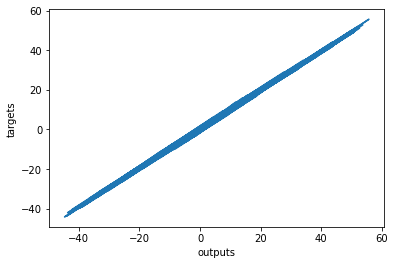

In [31]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Voila - what you see should be exactly the same as in the previous notebook!
# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# to achieve this simple result. However, once we go deeper in the next chapter,
# TensorFlow will save us hundreds of lines of code.